In [9]:
import pandas as pd
import os

# 현재 디렉터리에 'data' 디렉터리가 있는지 확인
if os.path.exists("data") and os.path.isdir("data"):
    data_path = "data/"
else:
    # 상위 디렉터리 '../data'를 확인
    data_path = "../data/"

In [16]:
df_mainage = pd.read_csv(data_path + "game_main_age.csv")
df_mainage.head()



,name,main_age
0,던전앤파이터,25_29
1,도타2,25_29
2,로블록스,06_12
3,리그오브레전드,19_24
4,마비노기,25_29


In [11]:
df_stats = pd.read_csv(data_path + "game_stats.csv")
df_stats.head()

,name,Simple,Easy,Just_Right,Tough,Unforgiving,_lt_1_Hour,_1_Hour,_2_Hours,_4_Hours,...,_60_Hours,_gt_80_Hours,Tried_It,Played_It,Halfway,Beat_It,Conquered_It,difficulty_score,playtime_score,achievement_score
0,던전앤파이터,3,6,52,14,3,1,0,0,1,...,5,23,43,88,21,22,9,3.10,79.19,2.27
1,도타2,23,26,206,596,328,11,6,4,4,...,10,630,175,478,121,409,283,4.00,91.70,3.10
2,로블록스,77,78,186,14,16,7,0,5,7,...,8,217,16,122,23,60,162,2.50,81.81,3.60
3,리그오브레전드,175,128,862,1476,396,65,33,11,20,...,50,1482,362,1258,376,1182,661,3.59,86.52,3.14
4,마비노기,4,7,23,42,10,1,0,0,1,...,0,40,56,125,23,32,15,3.55,95.35,2.30


In [12]:
df_reviews = pd.read_csv(data_path + "game_reviews.csv")
df_reviews.head()

,Game,Review
0,피파23,"라스트 FIFA, 그 이름"
1,피파23,EA FC 24 티저 나오자마자 별로 기대 안되길래 언젠간 해봐야지 했던 축구 게임...
2,피파23,엑박판으로 플레이 중이지만 PC판은 실행이 안됨.\n EA 패망의 서막을 알리는 게...
3,피파23,축구는 종교다.\nFIFA 23 | Official Launch Trailer | ...
4,피파23,최고의 손님 접대용 게임.\n하이퍼모션2가 적용되면서 움직임의 사실성이 훨씬 좋아졌...


## 참고자료
### 데이터 정의 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 청소년이 가장 많이 이용하는 게임 장르 (비율 데이터)
data_ratio = {
    "장르": ["RPG", "AOS", "FPS/TPS", "RTS", "스포츠 게임", "캐주얼 게임", "샌드박스", "기타"],
    "비율 (%)": [8.9, 9.2, 23.5, 2.6, 10.5, 3.8, 23.7, 17.8]
}

# 장르별 게임 수 데이터
data_count = {
    "RPG": ["쿠키런킹덤", "던전앤파이터", "메이플스토리", "월드오브워크래프트", "블레이드앤소울", "마비노기", "포켓몬스터"],
    "AOS": ["리그오브레전드", "펜타스톰", "도타2"],
    "FPS/TPS": ["브롤스타즈", "서든어택", "배틀그라운드", "오버워치", "발로란트"],
    "RTS": ["클래시오브클랜", "클래시로얄", "스타크래프트"],
    "스포츠 게임": ["피파온라인", "피파23"],
    "캐주얼 게임": ["캔디크러쉬사가"],
    "샌드박스": ["마인크래프트", "로블록스"],
    "기타": ["카트라이더", "테일즈런너", "크레이지아케이드", "모여봐요동물의숲", "모두의마블"]
}

# 데이터프레임 생성
df_ratio = pd.DataFrame(data_ratio)
genre_counts = {genre: len(games) for genre, games in data_count.items()}
df_count = pd.DataFrame({"장르": list(genre_counts.keys()), "게임 수": list(genre_counts.values())})

# ---------------------------
# 파이 차트 그리기 (비율 데이터)
# ---------------------------
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    df_ratio["비율 (%)"],
    labels=None,  # 라벨은 파이 안에 직접 추가
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors[:len(df_ratio)],  # 막대 그래프와 동일한 색상 사용
    textprops=dict(color="w")
)

# 파이 차트 안에 장르 추가
for i, text in enumerate(autotexts):
    text.set_text(f"{df_ratio['장르'][i]}\n{df_ratio['비율 (%)'][i]:.1f}%")
    text.set_color("black")  # 텍스트 색상 변경
    text.set_fontsize(10)

# 범례 추가
plt.legend(
    wedges,
    df_ratio["장르"],
    title="게임 장르",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# 제목 및 출처 추가
plt.title("청소년이 가장 많이 이용하는 게임 장르")
plt.text(0, -1.2, "출처: 2023 아동청소년 게임행동 종합 실태조사", fontsize=10, color="gray", ha="center", va="center")
plt.subplots_adjust(top=0.85, bottom=0.15)  # 여백 조정
plt.tight_layout()

# plt.show()
plt.savefig("외부자료-청소년이 가장 많이 이용하는 게임 장르.png", bbox_inches="tight")
plt.close()


# ---------------------------
# 막대 그래프 그리기 (게임 수 데이터)
# ---------------------------
plt.figure(figsize=(10, 8))
bars = plt.bar(
    df_count["장르"],
    df_count["게임 수"],
    color=plt.cm.Paired.colors[:len(df_count)]  # 기존 색상 유지
)

# 막대 위에 값 추가
for bar, count in zip(bars, df_count["게임 수"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(count), ha='center', fontsize=10)

# 제목 및 축 레이블 추가
plt.title("청소년이 가장 많이 이용하는 장르별 게임 수", fontsize=16)
plt.xlabel("장르", fontsize=12)
plt.ylabel("게임 수", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# 그리드 및 출처 추가
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.text(0, -1.2, "출처: 2023 아동청소년 게임행동 종합 실태조사", fontsize=10, color="gray", ha="center", va="center")
plt.subplots_adjust(top=0.85, bottom=0.15)  # 여백 조정
plt.tight_layout()

# plt.show()
plt.savefig("외부자료-청소년이 가장 많이 이용하는 장르별 게임 수.png", bbox_inches="tight")
plt.close()


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 청소년이 가장 많이 이용하는 게임 장르
# 데이터 입력
data = {
    "장르": ["RPG", "AOS", "FPS/TPS", "RTS", "스포츠 게임", "캐주얼 게임", "샌드박스", "기타"],
    "비율 (%)": [8.9, 9.2, 23.5, 2.6, 10.5, 3.8, 23.7, 17.8]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# Seaborn의 husl 팔레트 사용
colors = sns.color_palette("husl", len(df))

# 파이 차트 그리기
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    df["비율 (%)"],
    labels=None,  # 라벨은 파이 안에 직접 추가
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops=dict(color="w")
)

# 파이 차트 안에 장르 추가
for i, text in enumerate(autotexts):
    text.set_text(f"{df['장르'][i]}\n{df['비율 (%)'][i]:.1f}%")  # 장르 + 비율 추가
    text.set_color("black")  # 텍스트 색상 변경
    text.set_fontsize(10)

# 범례 추가
plt.legend(
    wedges,
    df["장르"],
    title="게임 장르",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# 제목 추가
plt.title("청소년이 가장 많이 이용하는 게임 장르 비율")
# 출처 추가
plt.text(0, -1.2, "출처: 2023 아동청소년 게임행동 종합 실태조사", fontsize=10, color="gray", ha="center", va="center")
plt.subplots_adjust(top=0.85, bottom=0.15)  # 상단과 하단 여백 줄이기
plt.tight_layout()
# plt.show()

plt.savefig("외부자료-청소년이 가장 많이 이용하는 게임 장르.png", bbox_inches="tight")
plt.close()

In [59]:

# 게임을 하는 이유
data_pc = {
    "Age Group": ["10대", "20대", "30대", "40대", "50대", "60-64세"],
    "여가 시간을 보내기 위해": [66.9, 69.1, 69.0, 76.0, 76.0, 78.2],
    "스트레스를 해소하기 위해": [43.8, 49.0, 53.0, 54.1, 53.4, 53.0],
    "지인이나 친구들과 관계 유지": [29.5, 25.8, 23.9, 22.8, 19.6, 8.1],
    "단순 재미 때문에": [22.2, 21.4, 20.1, 19.9, 18.7, 41.5],
    "다양한 종류의 게임 즐김": [10.5, 11.9, 14.8, 15.6, 16.0, 4.4],
}

data_mobile = {
    "Age Group": ["10대", "20대", "30대", "40대", "50대", "60-64세"],
    "여가 시간을 보내기 위해": [62.1, 62.1, 66.6, 70.4, 77.3, 77.3],
    "스트레스를 해소하기 위해": [27.1, 27.1, 34.9, 35.9, 34.1, 42.3],
    "지인이나 친구들과 관계 유지": [12.2, 9.4, 8.4, 8.4, 5.6, 2.8],
    "단순 재미 때문에": [25.8, 23.3, 24.9, 35.9, 28.1, 33.6],
    "어디서든 즐길 수 있어서": [43.2, 43.2, 45.8, 50.4, 53.4, 36.4],
}

df_pc = pd.DataFrame(data_pc)
df_mobile = pd.DataFrame(data_mobile)


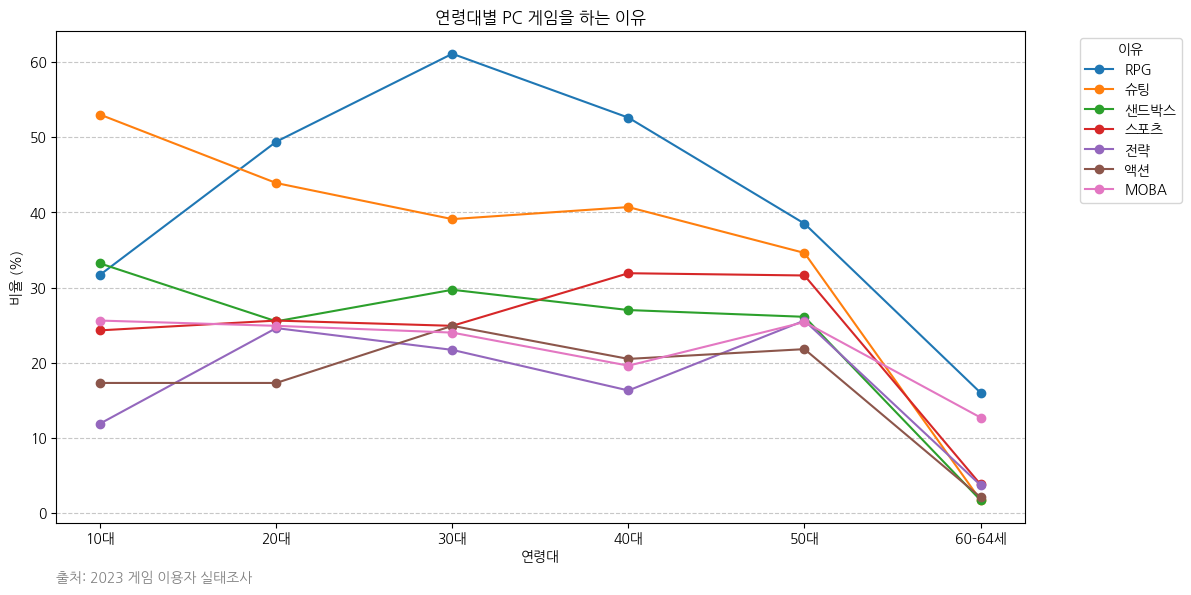

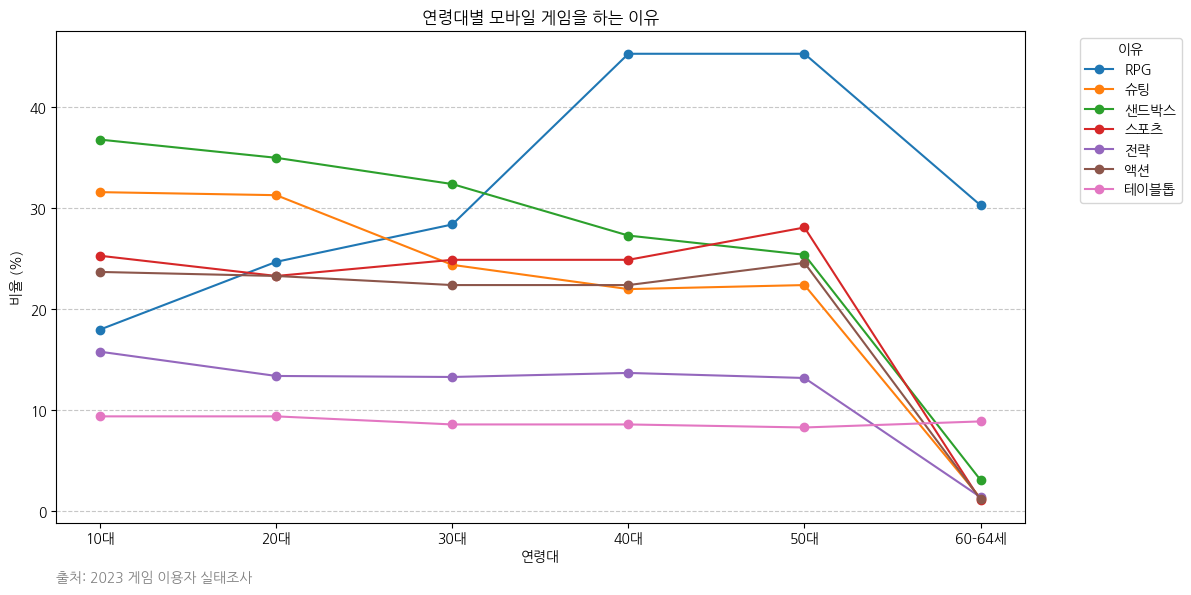

In [76]:
# PC 게임 이유 시각화 (라인 차트)
df_pc.set_index("Age Group").plot(kind="line", marker='o', figsize=(12, 6))
plt.title("연령대별 PC 게임을 하는 이유")
plt.xlabel("연령대")
plt.ylabel("비율 (%)")
plt.legend(title="이유", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 가로선 추가

# 출처 추가
plt.text(0, -0.1, "출처: 2023 게임 이용자 실태조사", fontsize=10, color="gray", ha="left", va="top", transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.15)  # 아래쪽 여백 조정
plt.tight_layout()
plt.show()
# plt.savefig("외부자료-연령대별 PC게임을 하는 이유.png", bbox_inches="tight")
# plt.close()

# 모바일 게임 이유 시각화 (라인 차트)
df_mobile.set_index("Age Group").plot(kind="line", marker='o', figsize=(12, 6))
plt.title("연령대별 모바일 게임을 하는 이유")
plt.xlabel("연령대")
plt.ylabel("비율 (%)")
plt.legend(title="이유", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 가로선 추가

# 출처 추가
plt.text(0, -0.1, "출처: 2023 게임 이용자 실태조사", fontsize=10, color="gray", ha="left", va="top", transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.15)  # 아래쪽 여백 조정
plt.tight_layout()
plt.show()
# plt.savefig("외부자료-연령대별 모바일 게임을 하는 이유.png", bbox_inches="tight")
# plt.close()


In [62]:
# PC 게임 장르 데이터 입력
data_pc = {
    "Age Group": ["10대", "20대", "30대", "40대", "50대", "60-64세"],
    "RPG": [31.7, 49.4, 61.1, 52.6, 38.5, 16.0],
    "슈팅": [53.0, 43.9, 39.1, 40.7, 34.6, 1.7],
    "샌드박스": [33.2, 25.5, 29.7, 27.0, 26.1, 1.7],
    "스포츠": [24.3, 25.6, 24.9, 31.9, 31.6, 3.8],
    "전략": [11.9, 24.6, 21.7, 16.3, 25.6, 3.7],
    "액션": [17.3, 17.3, 24.9, 20.5, 21.8, 2.1],
    "MOBA": [25.6, 24.9, 24.0, 19.6, 25.4, 12.7],
}

# 모바일 게임 장르 데이터 입력
data_mobile = {
    "Age Group": ["10대", "20대", "30대", "40대", "50대", "60-64세"],
    "RPG": [18.0, 24.7, 28.4, 45.3, 45.3, 30.3],
    "슈팅": [31.6, 31.3, 24.4, 22.0, 22.4, 1.3],
    "샌드박스": [36.8, 35.0, 32.4, 27.3, 25.4, 3.1],
    "스포츠": [25.3, 23.3, 24.9, 24.9, 28.1, 1.1],
    "전략": [15.8, 13.4, 13.3, 13.7, 13.2, 1.4],
    "액션": [23.7, 23.3, 22.4, 22.4, 24.6, 1.2],
    "테이블톱": [9.4, 9.4, 8.6, 8.6, 8.3, 8.9],
}


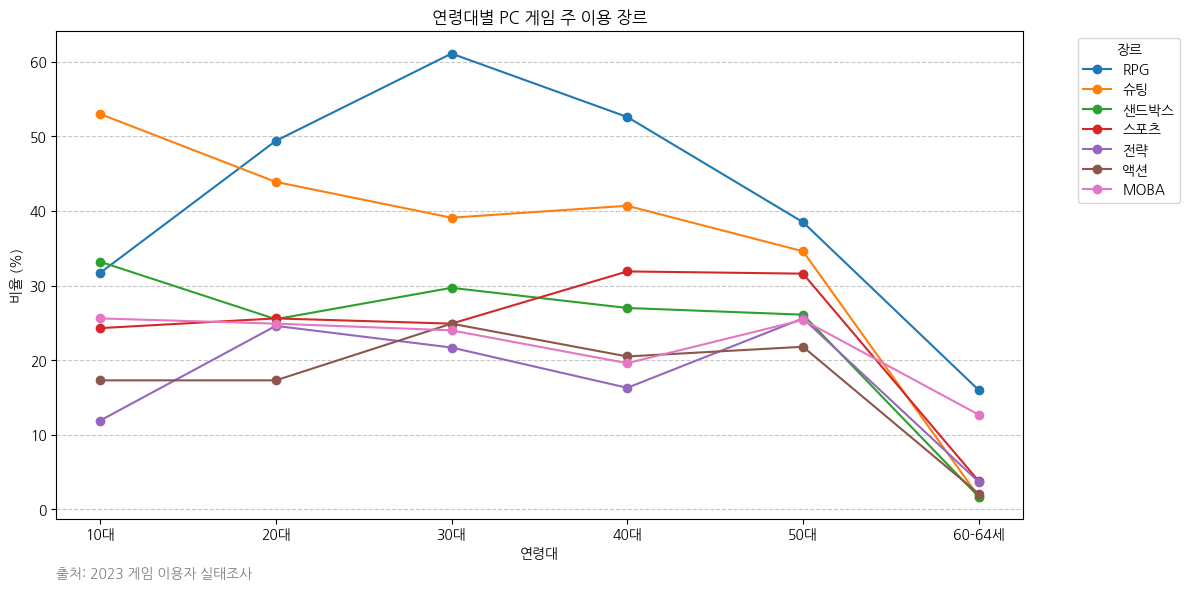

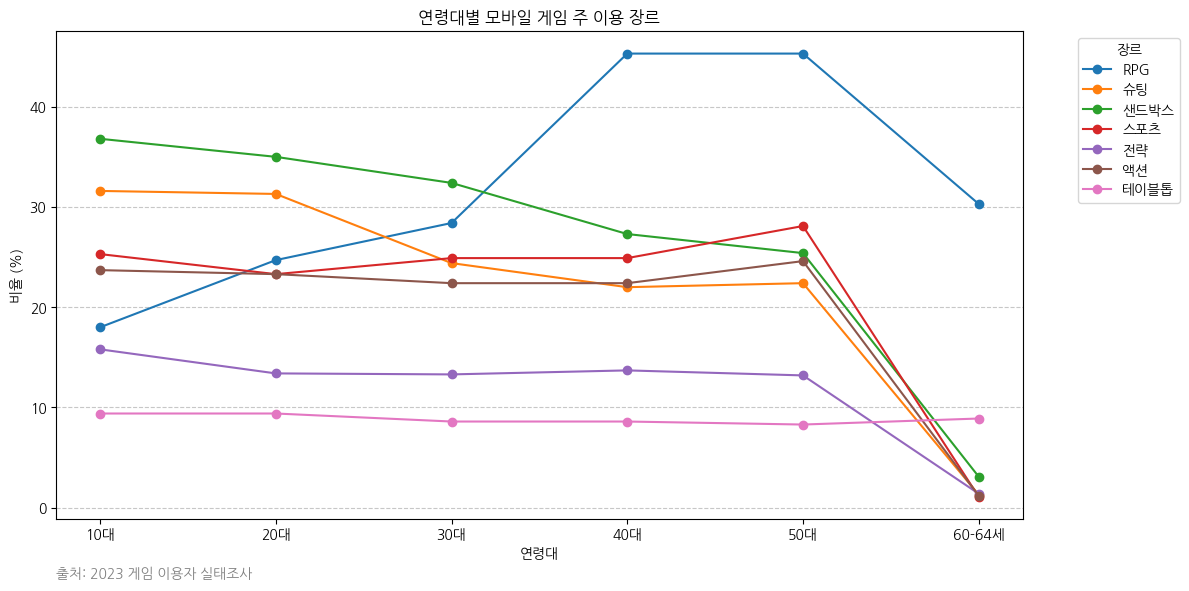

In [65]:
# PC 게임 장르 시각화
df_pc = pd.DataFrame(data_pc)
df_pc.set_index("Age Group").plot(kind="line", marker='o', figsize=(12, 6))
plt.title("연령대별 PC 게임 주 이용 장르")
plt.xlabel("연령대")
plt.ylabel("비율 (%)")
plt.legend(title="장르", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# 출처 추가
plt.text(0, -0.1, "출처: 2023 게임 이용자 실태조사", fontsize=10, color="gray", ha="left", va="top", transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.15)  # 아래쪽 여백 조정
plt.tight_layout()
plt.show()
# plt.savefig("외부자료-연령대별 PC 게임 주 이용 장르.png", bbox_inches="tight")
# plt.close()

# 모바일 게임 장르 시각화
df_mobile = pd.DataFrame(data_mobile)
df_mobile.set_index("Age Group").plot(kind="line", marker='o', figsize=(12, 6))
plt.title("연령대별 모바일 게임 주 이용 장르")
plt.xlabel("연령대")
plt.ylabel("비율 (%)")
plt.legend(title="장르", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# 출처 추가
plt.text(0, -0.1, "출처: 2023 게임 이용자 실태조사", fontsize=10, color="gray", ha="left", va="top", transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.15)  # 아래쪽 여백 조정
plt.tight_layout()
plt.show()
# plt.savefig("외부자료-연령대별 모바일 게임 주 이용 장르.png", bbox_inches="tight")
# plt.close()


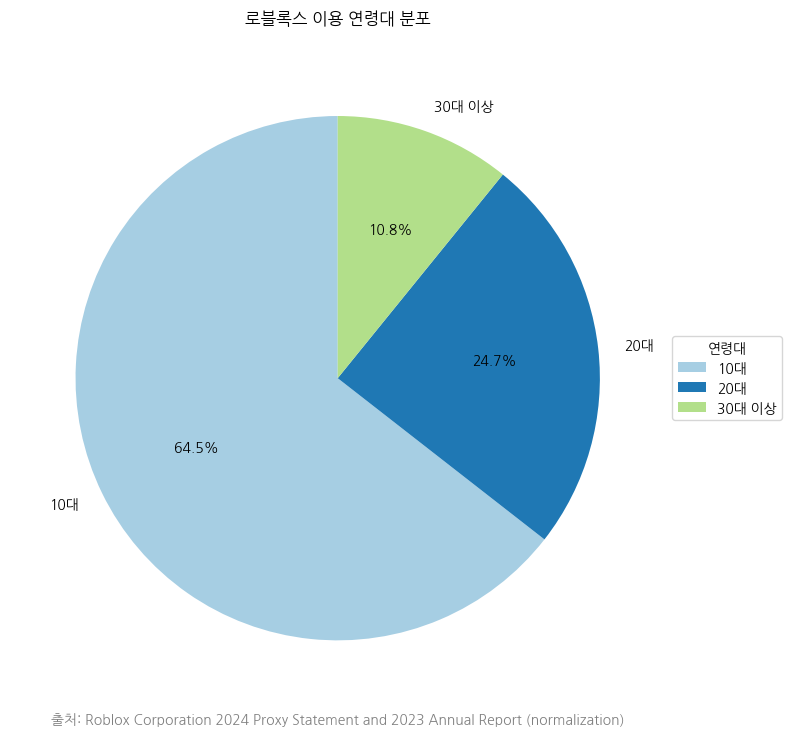

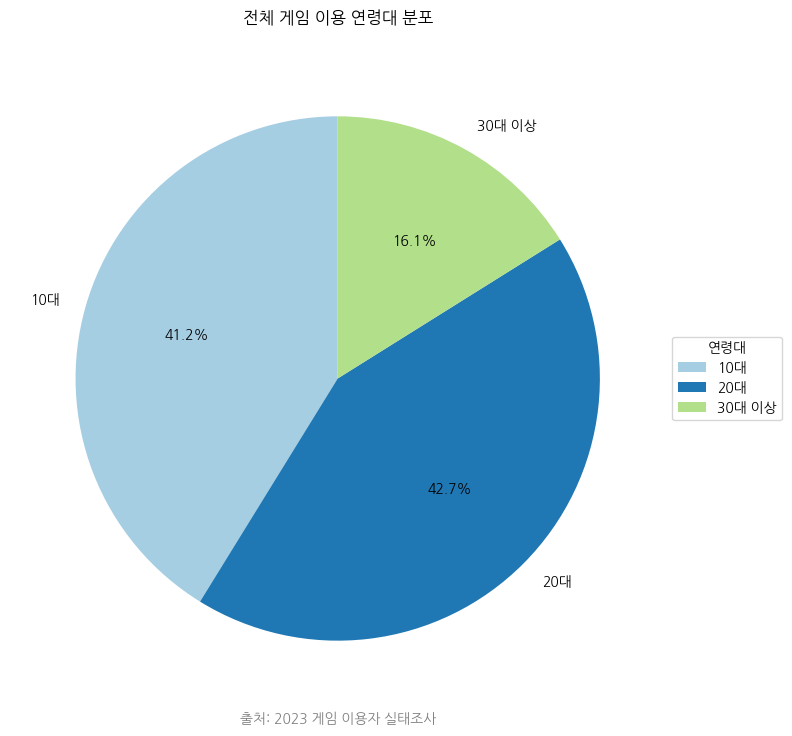

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 원본 로블록스 데이터
roblox_data = {
    "Age Group": ["10대", "20대", "30대 이상"],
    "Original Percentage": [21 + 21, 23, 18]
}

# 로블록스 데이터 정규화 (17~24 나이를 10대와 20대에, 25+ 나이를 20대와 30대 이상에 재분배)
adjusted_percentage = {
    "10대": roblox_data["Original Percentage"][0] + (23 * 0.5),
    "20대": (23 * 0.5) + (18 * 0.5),
    "30대 이상": (18 * 0.5)
}

# 정규화된 데이터를 데이터프레임으로 생성
df_roblox = pd.DataFrame({
    "Age Group": ["10대", "20대", "30대 이상"],
    "Percentage": [adjusted_percentage["10대"], adjusted_percentage["20대"], adjusted_percentage["30대 이상"]]
})

# 전체 게임 이용률 데이터
overall_game_data = {
    "Age Group": ["10대", "20대", "30대 이상"],
    "Percentage": [41.2, 42.7, 16.1]  # 정규화된 전체 데이터
}
df_overall = pd.DataFrame(overall_game_data)

# 로블록스 데이터 파이 차트
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors[:len(df_roblox)]
wedges, texts, autotexts = plt.pie(
    df_roblox["Percentage"],
    labels=df_roblox["Age Group"],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops=dict(color="black")
)
plt.title("로블록스 이용 연령대 분포", pad=20)
plt.legend(wedges, df_roblox["Age Group"], title="연령대", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.text(0, -1.3, "출처: Roblox Corporation 2024 Proxy Statement and 2023 Annual Report (normalization)", fontsize=10, color="gray", ha="center", va="center")
plt.tight_layout()
plt.show()
# plt.savefig("외부자료-로블록스 이용 연령대 분포.png", bbox_inches="tight")
# plt.close()

# 전체 게임 이용률 파이 차트
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    df_overall["Percentage"],
    labels=df_overall["Age Group"],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops=dict(color="black")
)
plt.title("전체 게임 이용 연령대 분포", pad=20)
plt.legend(wedges, df_overall["Age Group"], title="연령대", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.text(0, -1.3, "출처: 2023 게임 이용자 실태조사", fontsize=10, color="gray", ha="center", va="center")
plt.tight_layout()
plt.show()
# plt.savefig("외부자료-전체 게임 이용 연령대 분포.png", bbox_inches="tight")
# plt.close()


In [72]:
# 장르별 게임
data = {
    "RPG": ["쿠키런킹덤", "던전앤파이터", "메이플스토리", "월드오브워크래프트", "블레이드앤소울", "마비노기", "포켓몬스터"],
    "AOS": ["리그오브레전드", "펜타스톰", "도타2"],
    "FPS": ["브롤스타즈", "서든어택", "배틀그라운드", "오버워치", "발로란트"],
    "RTS": ["클래시오브클랜", "클래시로얄", "스타크래프트"],
    "스포츠": ["피파온라인", "피파23"],
    "캐주얼": ["캔디크러쉬사가"],
    "샌드박스": ["마인크래프트", "로블록스"],
    "기타": ["카트라이더", "테일즈런너", "크레이지아케이드", "모여봐요동물의숲", "모두의마블"]
}

# 데이터 변환
rows = [{"name": game, "genre": genre} for genre, games in data.items() for game in games]

# 데이터프레임 생성
df_genre = pd.DataFrame(rows)
df_genre


,name,genre
0,쿠키런킹덤,RPG
1,던전앤파이터,RPG
2,메이플스토리,RPG
3,월드오브워크래프트,RPG
4,블레이드앤소울,RPG
5,마비노기,RPG
6,포켓몬스터,RPG
7,리그오브레전드,AOS
8,펜타스톰,AOS
9,도타2,AOS


In [75]:
# 장르별 게임 수 시각화
genre_counts = {genre: len(games) for genre, games in data.items()}

# 데이터 시각화 준비
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(genres, counts, color=plt.cm.Paired.colors[:len(genres)])
plt.title("청소년이 가장 많이 이용하는 장르별 게임 수", fontsize=16)
plt.xlabel("장르", fontsize=12)
plt.ylabel("게임 수", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# 그래프 꾸미기
for i, count in enumerate(counts):
    plt.text(i, count + 0.2, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
# 출처 추가
plt.text(0, -1.2, "출처: 2023 아동청소년 게임행동 종합 실태조사", fontsize=10, color="gray", ha="center", va="center")
plt.subplots_adjust(top=0.85, bottom=0.15)  # 상단과 하단 여백 줄이기
plt.tight_layout()
# plt.show()

plt.savefig("외부자료-청소년이 가장 많이 이용하는 장르별 게임 수.png", bbox_inches="tight")
plt.close()

In [17]:
print(sorted(list(set(df_mainage['name']))))
print(sorted(list(set(df_stats['name']))))
print(sorted(list(set(df_reviews['Game']))))
print(sorted(list(set(df_genre['name']))))

['던전앤파이터', '도타2', '로블록스', '리그오브레전드', '마비노기', '마인크래프트', '메이플스토리', '모두의마블', '모여봐요동물의숲', '발로란트', '배틀그라운드', '브롤스타즈', '블레이드앤소울', '서든어택', '스타크래프트', '오버워치', '월드오브워크래프트', '카트라이더', '캔디크러쉬사가', '쿠키런킹덤', '크레이지아케이드', '클래시로얄', '클래시오브클랜', '테일즈런너', '펜타스톰', '포켓몬스터', '피파23', '피파온라인']
['던전앤파이터', '도타2', '로블록스', '리그오브레전드', '마비노기', '마인크래프트', '메이플스토리', '모여봐요동물의숲', '발로란트', '배틀그라운드', '브롤스타즈', '블레이드앤소울', '서든어택', '스타크래프트', '오버워치', '월드오브워크래프트', '카트라이더', '캔디크러쉬사가', '쿠키런킹덤', '크레이지아케이드', '클래시로얄', '클래시오브클랜', '테일즈런너', '펜타스톰', '포켓몬스터', '피파23', '피파온라인']
['던전앤파이터', '도타2', '로블록스', '리그오브레전드', '마비노기', '마인크래프트', '메이플스토리', '모두의마블', '모여봐요동물의숲', '발로란트', '배틀그라운드', '브롤스타즈', '블레이드앤소울', '서든어택', '스타크래프트', '아레나오브발러', '오버워치', '월드오브워크래프트', '카트라이더', '캔디크러쉬사가', '쿠키런킹덤', '크레이지아케이드', '클래시로얄', '클래시오브클랜', '테일즈런너', '포켓몬스터', '피파23', '피파온라인']
['던전앤파이터', '도타2', '로블록스', '리그오브레전드', '마비노기', '마인크래프트', '메이플스토리', '모두의마블', '모여봐요동물의숲', '발로란트', '배틀그라운드', '브롤스타즈', '블레이드앤소울', '서든어택', '스타크래프트', '오버워치', '월드오브워크래프트', '카트라이더', '캔디크러쉬사가', '쿠키런킹덤', '크레이지아케이드', '

In [ ]:
# # Step 1: df_mainage와 df_difficulty를 "name"과 "game" 기준으로 조인
# df_difficulty_tmp = df_difficulty[["game", "average"]]
# df_difficulty_tmp.columns = ["name", "difficulty"]
# df_difficulty_tmp.loc[df_difficulty_tmp['name'] == '모여봐요동물의숲:뉴호라이즌', 'name'] = '모여봐요동물의숲'
# df_meta = pd.merge(df_mainage, df_difficulty_tmp, on="name", how="outer")

# Step 1: df_mainage와 df_stats를 "name" 기준으로 조인
df_stats_tmp = df_stats[["name", "difficulty_score", "playtime_score", "achievement_score"]]
df_stats_tmp.columns = ["name", "difficulty", "playtime", "achievement"]
df_meta = pd.merge(df_mainage, df_stats_tmp, on="name", how="outer")

# Step 2: df_genre와 기존 병합된 데이터프레임을 "name" 기준으로 조인
df_meta = pd.merge(df_meta, df_genre, on="name", how="outer")

# df_meta.to_csv(data_path + "game_meta.csv", index=False)
df_meta

,name,main_age,difficulty,playtime,achievement,genre
0,던전앤파이터,25_29,3.10,79.19,2.27,RPG
1,도타2,25_29,4.00,91.70,3.10,AOS
2,로블록스,06_12,2.50,81.81,3.60,샌드박스
3,리그오브레전드,19_24,3.59,86.52,3.14,AOS
4,마비노기,25_29,3.55,95.35,2.30,RPG
5,마인크래프트,13_18,2.83,84.36,3.31,샌드박스
6,메이플스토리,25_29,2.93,91.88,2.19,RPG
7,모두의마블,13_18,NaN,NaN,NaN,기타
8,모여봐요동물의숲,06_12,1.94,92.93,3.44,기타
9,발로란트,13_18,3.72,75.23,2.81,FPS


### 시각화

In [19]:
import os

# 현재 디렉터리에 'data' 디렉터리가 있는지 확인
if os.path.exists("data") and os.path.isdir("data"):
    data_path = "data/"
else:
    # 상위 디렉터리 '../data'를 확인
    data_path = "../data/"

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib 

df_meta = pd.read_csv(data_path + "game_meta.csv")
df_meta = df_meta.dropna(subset=["main_age"])
df_meta["main_age"] = df_meta["main_age"].replace("06_12", "12세이하")
df_meta["main_age"] = df_meta["main_age"].replace("13_18", "13~18세")
df_meta["main_age"] = df_meta["main_age"].replace("19_24", "19~24세")
df_meta["main_age"] = df_meta["main_age"].replace("25_29", "25~29세")
# 원하는 연령대 순서 지정
age_order = ["12세이하", "13~18세", "19~24세", "25~29세"]

# 'main_age'를 범주형 데이터로 변환하여 순서 지정
df_meta["main_age"] = pd.Categorical(df_meta["main_age"], categories=age_order, ordered=True)



C:\Users\user\AppData\Local\Temp\ipykernel_13236\2755751860.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_age = df_meta.groupby(["main_age", "genre"]).size().unstack(fill_value=0)


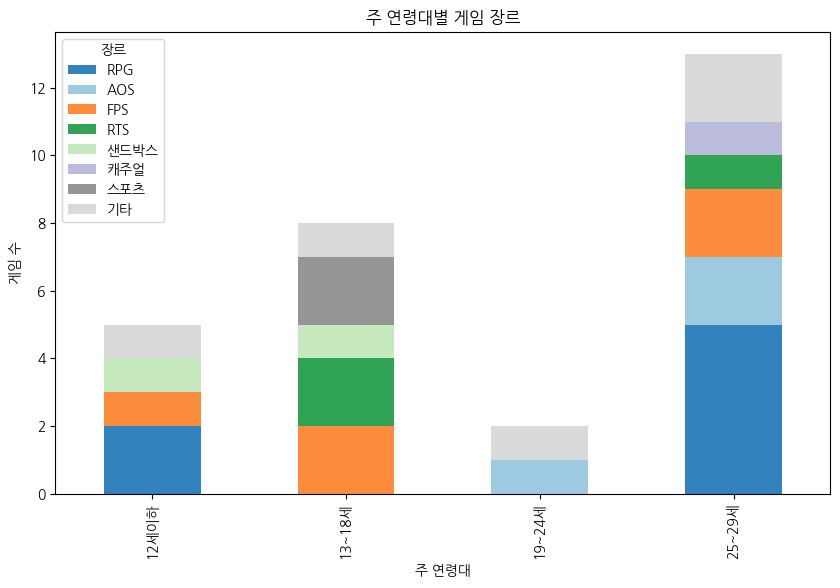

In [21]:
genre_age = df_meta.groupby(["main_age", "genre"]).size().unstack(fill_value=0)
genre_order = ["RPG", "AOS", "FPS", "RTS", "샌드박스", "캐주얼", "스포츠", "기타"]
genre_age = genre_age.reindex(columns=genre_order)
genre_age.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20c")


plt.title("주 연령대별 게임 장르")
plt.xlabel("주 연령대")
plt.ylabel("게임 수")
plt.legend(title="장르")
plt.show()
# plt.savefig("주 연령대별 게임 장르.png")
# plt.close()

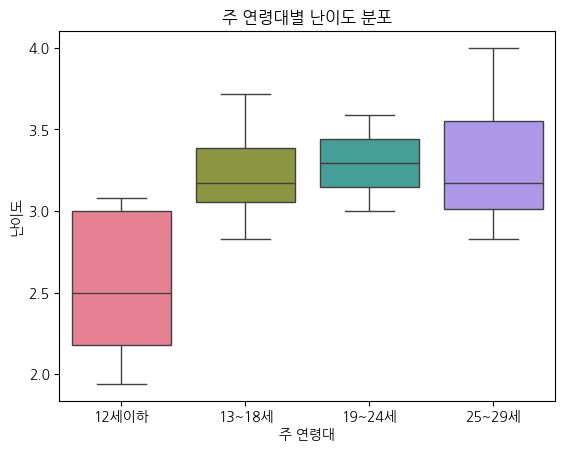

In [11]:
sns.boxplot(x="main_age", y="difficulty", data=df_meta, hue="main_age", palette="husl")
plt.title("주 연령대별 난이도 분포")
plt.xlabel("주 연령대")
plt.ylabel("난이도")
plt.show()
# plt.savefig("주 연령대별 난이도 분포.png")
# plt.close()

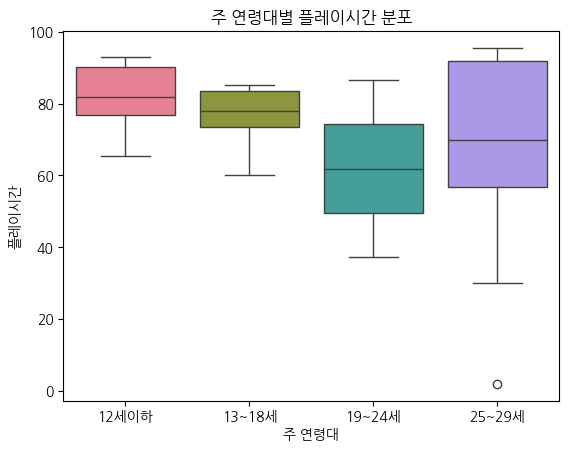

In [13]:
sns.boxplot(x="main_age", y="playtime", data=df_meta, hue="main_age", palette="husl")
plt.title("주 연령대별 플레이시간 분포")
plt.xlabel("주 연령대")
plt.ylabel("플레이시간")
plt.show()
# plt.savefig("주 연령대별 플레이시간 분포.png")
# plt.close()

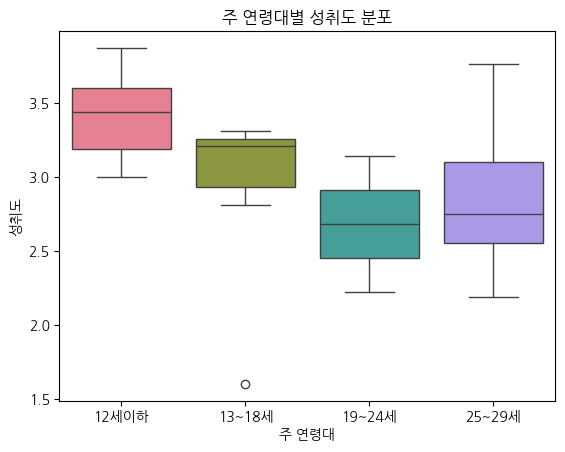

In [16]:
sns.boxplot(x="main_age", y="achievement", data=df_meta, hue="main_age", palette="husl")
plt.title("주 연령대별 성취도 분포")
plt.xlabel("주 연령대")
plt.ylabel("성취도")
plt.show()
# plt.savefig("주 연령대별 성취도 분포.png")
# plt.close()

In [18]:
# genre_difficulty = df_meta.groupby("genre")["difficulty"].mean().reset_index()
# genre_order = ["RPG", "AOS", "FPS", "RTS", "샌드박스", "캐주얼", "스포츠", "기타"]

# sns.barplot(x="difficulty", y="genre", data=genre_difficulty, order=genre_order, palette="husl")
# plt.title("장르별 평균 난이도")
# plt.xlabel("평균 난이도")
# plt.ylabel("장르")
# plt.show()
# # plt.savefig("장르별 평균 난이도.png")
# # plt.close()

In [107]:
# genre_difficulty = df_meta.groupby("genre")["playtime"].mean().reset_index()
# genre_order = ["RPG", "AOS", "FPS", "RTS", "샌드박스", "캐주얼", "스포츠", "기타"]

# sns.barplot(x="playtime", y="genre", data=genre_difficulty, order=genre_order, palette="husl")
# plt.title("장르별 평균 플레이시간")
# plt.xlabel("평균 플레이시간")
# plt.ylabel("장르")
# plt.show()
# # plt.savefig("장르별 평균 플레이시간.png")
# # plt.close()

In [108]:
# genre_difficulty = df_meta.groupby("genre")["achievement"].mean().reset_index()
# genre_order = ["RPG", "AOS", "FPS", "RTS", "샌드박스", "캐주얼", "스포츠", "기타"]
# sns.barplot(x="achievement", y="genre", data=genre_difficulty, order=genre_order, palette="husl")
# plt.title("장르별 평균 성취도")
# plt.xlabel("평균 성취도")
# plt.ylabel("장르")
# plt.show()
# # plt.savefig("장르별 평균 성취도.png")
# # plt.close()

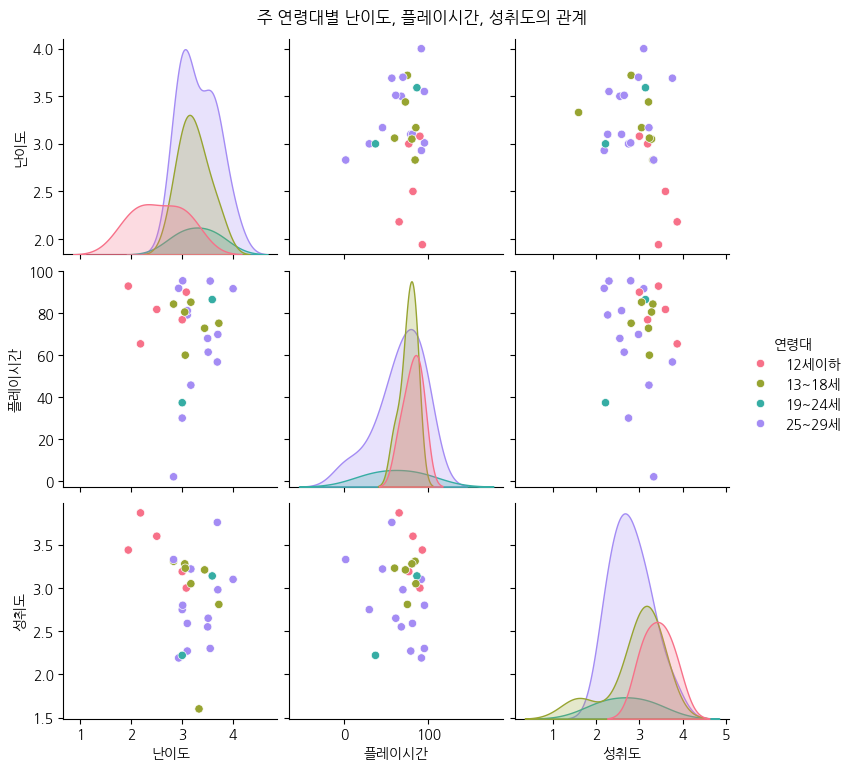

In [23]:

selected_columns = ["difficulty", "playtime", "achievement", "main_age"]

# 컬럼명을 한글로 매핑
column_mapping = {
    "difficulty": "난이도",
    "playtime": "플레이시간",
    "achievement": "성취도",
    "main_age": "연령대"
}

# 컬럼명을 임시로 변경하여 pairplot 생성
df_temp = df_meta.rename(columns=column_mapping)

# pairplot 생성
g = sns.pairplot(df_temp, hue="연령대", palette="husl", diag_kind="kde")

# 제목 추가
plt.suptitle("주 연령대별 난이도, 플레이시간, 성취도의 관계", y=1.02)

plt.show()
# plt.savefig("주 연령대별 난이도 플레이시간 성취도의 관계.png", bbox_inches="tight")
# plt.close()

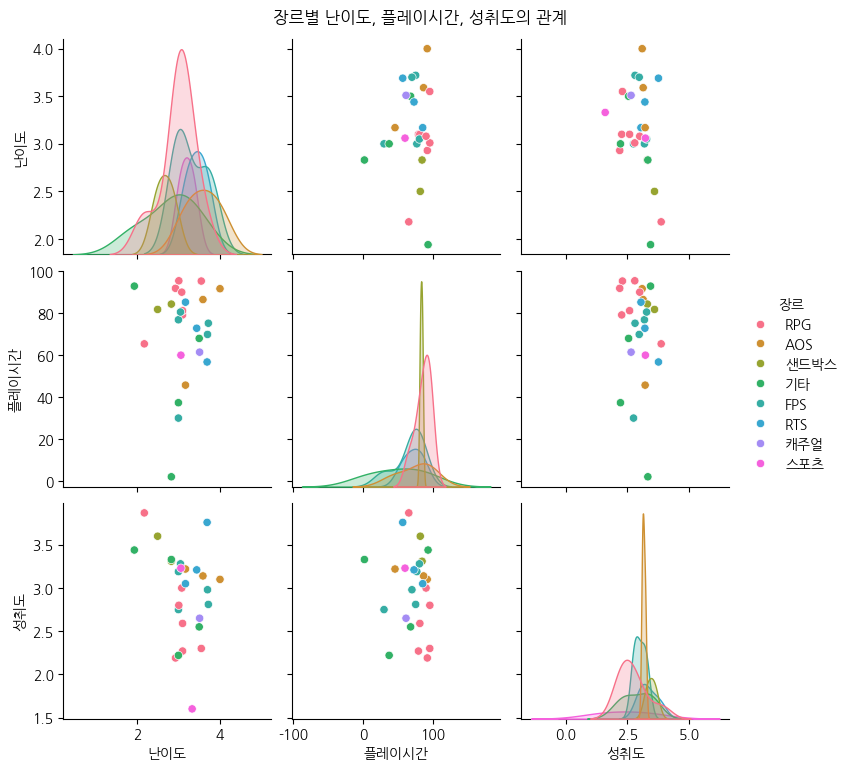

In [25]:

selected_columns = ["difficulty", "playtime", "achievement", "genre"]

# 컬럼명을 한글로 매핑
column_mapping = {
    "difficulty": "난이도",
    "playtime": "플레이시간",
    "achievement": "성취도",
    "genre": "장르"
}

# 컬럼명을 임시로 변경하여 pairplot 생성
df_temp = df_meta.rename(columns=column_mapping)

# pairplot 생성
g = sns.pairplot(df_temp, hue="장르", palette="husl", diag_kind="kde")

# 제목 추가
plt.suptitle("장르별 난이도, 플레이시간, 성취도의 관계", y=1.02)

plt.show()
# plt.savefig("장르별 난이도 플레이시간 성취도의 관계.png", bbox_inches="tight")
# plt.close()

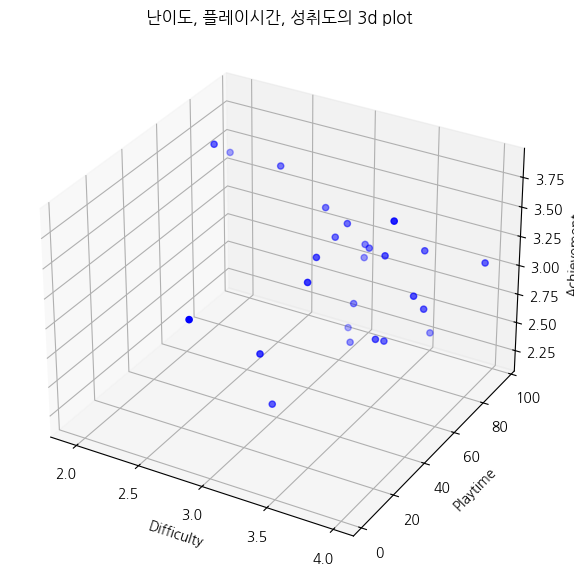

In [118]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 데이터 추가
ax.scatter(df_meta["difficulty"], df_meta["playtime"], df_meta["achievement"], c="blue", marker='o')

# 축 레이블
ax.set_xlabel('Difficulty')
ax.set_ylabel('Playtime')
ax.set_zlabel('Achievement')

plt.title("난이도, 플레이시간, 성취도의 3d plot")
plt.show()
# plt.savefig("난이도 플레이시간 성취도 3d plot.png")
# plt.close()

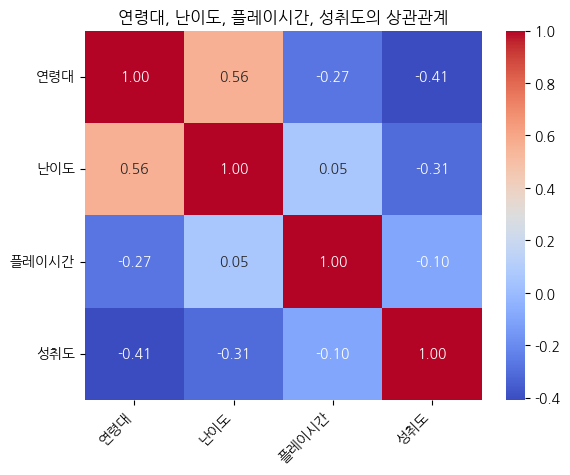

In [121]:
# 연령 카테고리를 수치화
# age_mapping = {"06_12": 6, "13_18": 13, "19_24": 19, "25_29": 25}
# age_mapping = {"06_12": 12, "13_18": 18, "19_24": 24, "25_29": 29}
age_mapping = {"12세이하": 6, "13~18세": 15.5, "19~24세": 21.5, "25~29세": 27}
df_meta["main_age_numeric"] = df_meta["main_age"].map(age_mapping)

# 상관행렬 계산 (연령 카테고리 포함)
corr_matrix = df_meta[["main_age_numeric", "difficulty", "playtime", "achievement"]].corr()

# 히트맵 시각화
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# 한글 레이블 설정
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["연령대", "난이도", "플레이시간", "성취도"], rotation=45, ha="right")
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["연령대", "난이도", "플레이시간", "성취도"], rotation=0)

plt.title("연령대, 난이도, 플레이시간, 성취도의 상관관계")
plt.show()
# plt.savefig("연령대 난이도 플레이시간 성취도 상관관계.png")
# plt.close()

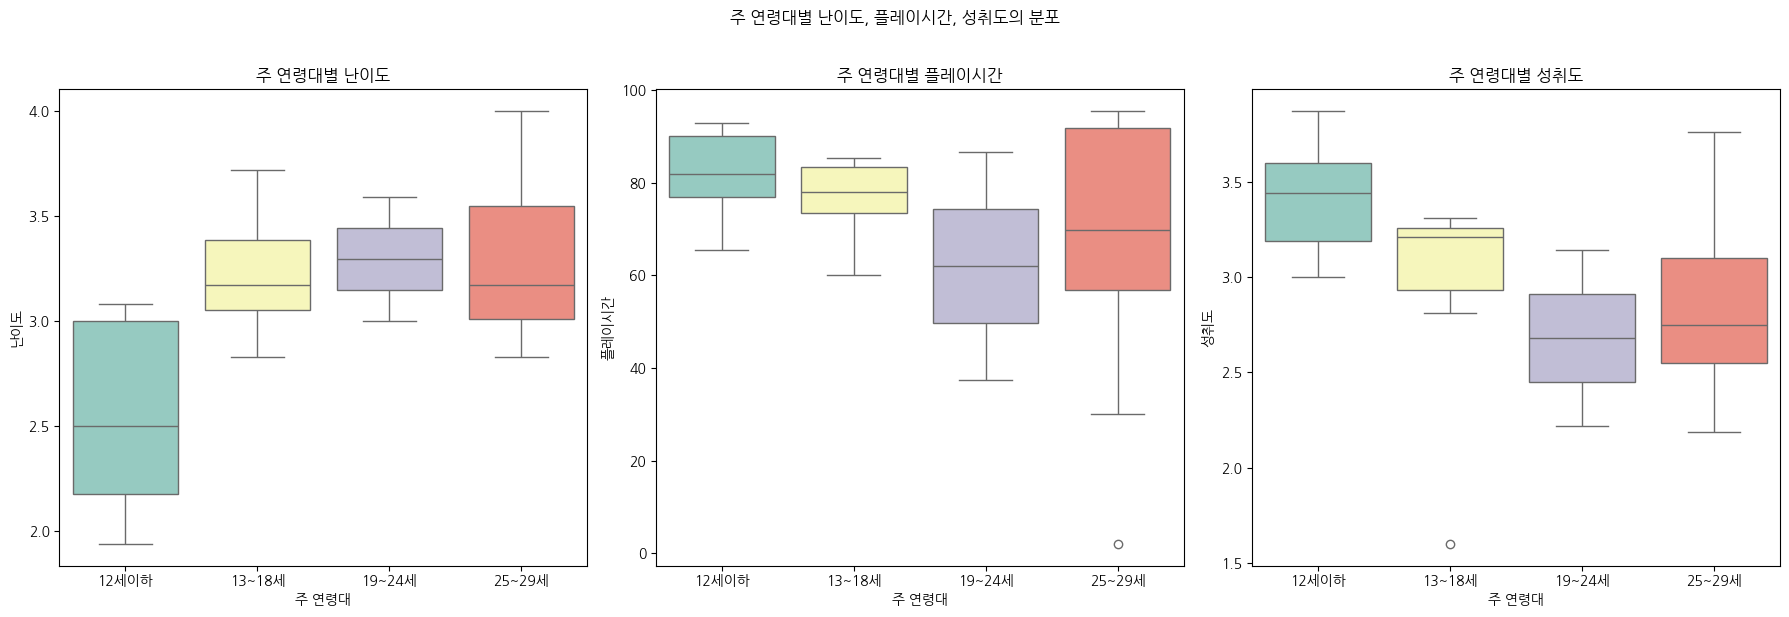

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 연령대별 난이도
sns.boxplot(x="main_age", y="difficulty", data=df_meta, ax=axes[0], palette="Set3", hue="main_age", dodge=False, legend=False)
axes[0].set_title("주 연령대별 난이도")
axes[0].set_xlabel("주 연령대")
axes[0].set_ylabel("난이도")

# 연령대별 플레이시간
sns.boxplot(x="main_age", y="playtime", data=df_meta, ax=axes[1], palette="Set3", hue="main_age", dodge=False, legend=False)
axes[1].set_title("주 연령대별 플레이시간")
axes[1].set_xlabel("주 연령대")
axes[1].set_ylabel("플레이시간")

# 연령대별 성취도
sns.boxplot(x="main_age", y="achievement", data=df_meta, ax=axes[2], palette="Set3", hue="main_age", dodge=False, legend=False)
axes[2].set_title("주 연령대별 성취도")
axes[2].set_xlabel("주 연령대")
axes[2].set_ylabel("성취도")

# 전체 제목 및 레이아웃 조정
plt.suptitle("주 연령대별 난이도, 플레이시간, 성취도의 분포", y=1.02)
plt.tight_layout()

# 그래프 보여주기 및 저장
plt.show()
# plt.savefig("주 연령대별 난이도 플레이시간 성취도 분포.png", bbox_inches="tight")
# plt.close()


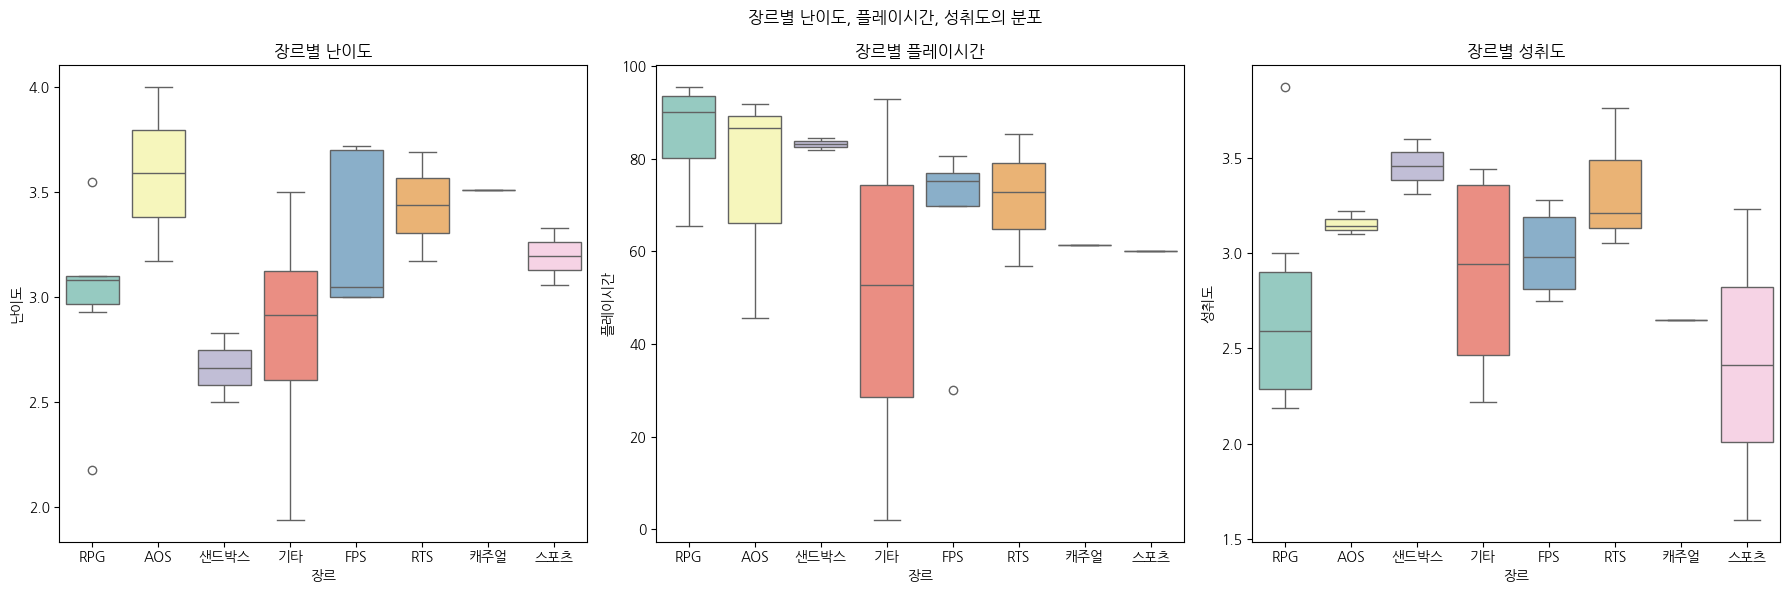

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 장르별 난이도
sns.boxplot(x="genre", y="difficulty", data=df_meta, ax=axes[0], palette="Set3", hue="genre", dodge=False, legend=False)
axes[0].set_title("장르별 난이도")
axes[0].set_xlabel("장르")
axes[0].set_ylabel("난이도")

# 장르별 플레이시간
sns.boxplot(x="genre", y="playtime", data=df_meta, ax=axes[1], palette="Set3", hue="genre", dodge=False, legend=False)
axes[1].set_title("장르별 플레이시간")
axes[1].set_xlabel("장르")
axes[1].set_ylabel("플레이시간")

# 장르별 성취도
sns.boxplot(x="genre", y="achievement", data=df_meta, ax=axes[2], palette="Set3", hue="genre", dodge=False, legend=False)
axes[2].set_title("장르별 성취도")
axes[2].set_xlabel("장르")
axes[2].set_ylabel("성취도")

plt.suptitle("장르별 난이도, 플레이시간, 성취도의 분포")
plt.tight_layout()
plt.show()
# plt.savefig("장르별 난이도 플레이시간 성취도 분포.png", bbox_inches="tight")
# plt.close()

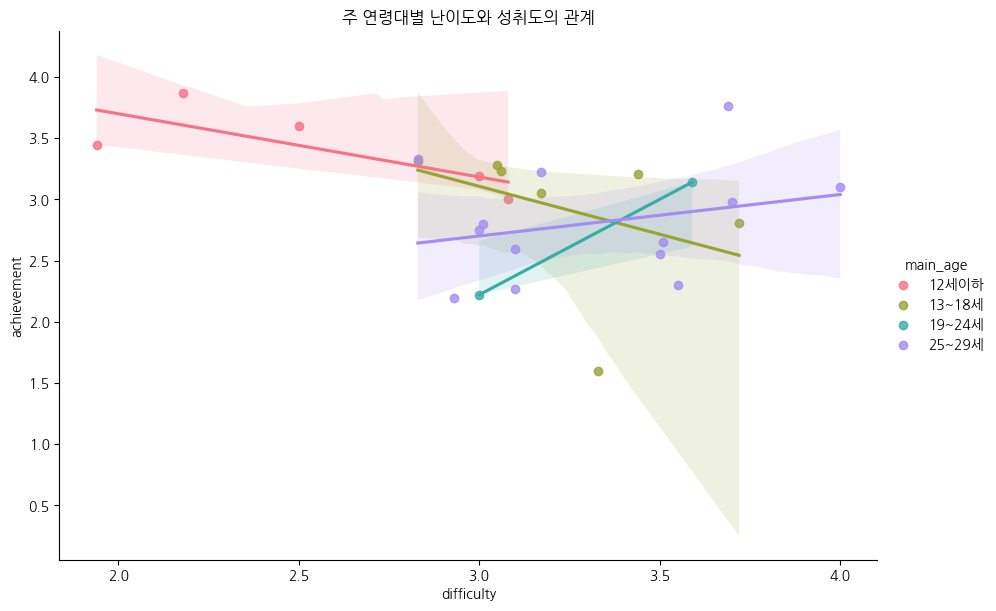

In [41]:
sns.lmplot(x="difficulty", y="achievement", data=df_meta, hue="main_age", palette="husl", height=6, aspect=1.5)
plt.title("주 연령대별 난이도와 성취도의 관계")

plt.show()
# plt.savefig("주 연령대별 난이도 성취도 관계.png", bbox_inches="tight")
# plt.close()

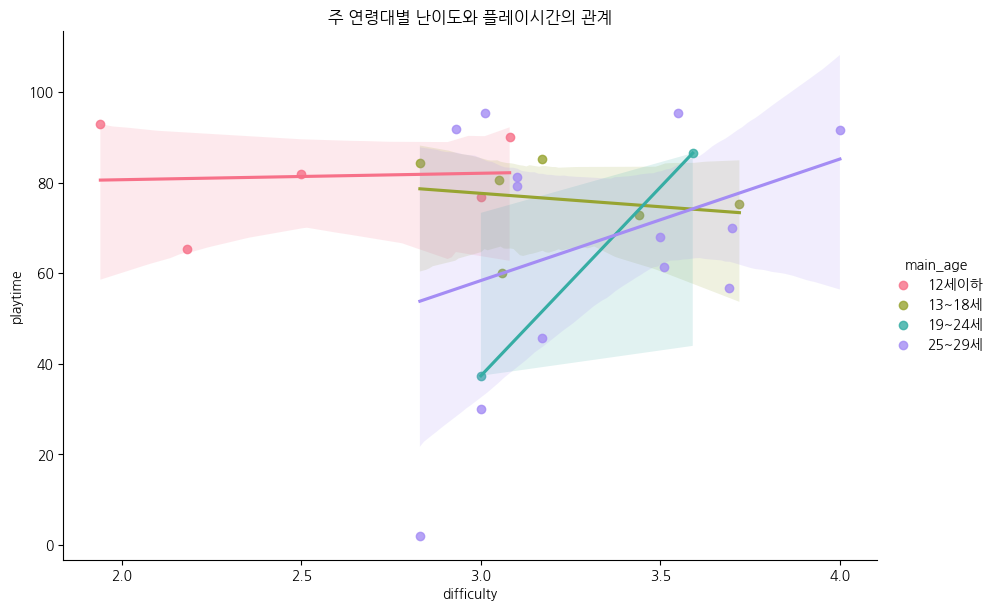

In [45]:
sns.lmplot(x="difficulty", y="playtime", data=df_meta, hue="main_age", palette="husl", height=6, aspect=1.5)
plt.title("주 연령대별 난이도와 플레이시간의 관계")

plt.show()
# plt.savefig("주 연령대별 난이도 플레이시간 관계.png", bbox_inches="tight")
# plt.close()

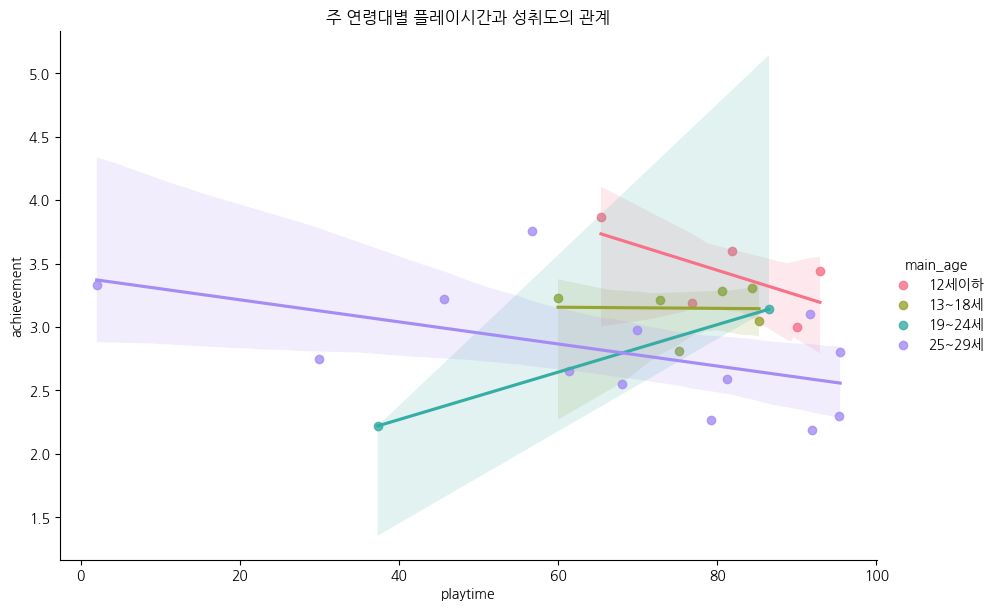

In [47]:
sns.lmplot(x="playtime", y="achievement", data=df_meta, hue="main_age", palette="husl", height=6, aspect=1.5)
plt.title("주 연령대별 플레이시간과 성취도의 관계")

plt.show()
# plt.savefig("주 연령대별 플레이시간 성취도 관계.png", bbox_inches="tight")
# plt.close()